In [1]:
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [2]:
# Read in the data
df = pd.read_csv("Resources/runner_result_runner_result.csv")
df = df.drop(columns="Unnamed: 0")
df

,meetingName,meetingDate,raceNumber,runnerNumber,location,weatherCondition,trackCondition,raceName,raceStartTime,raceDistance,...,track (rider wins),region (rider wins),last30Days (rider wins),last12Months (rider wins),runner (rider wins),track (rider placings),region (rider placings),last30Days (rider placings),last12Months (rider placings),runner (rider placings)
0,STONY CREEK,01/02/2022 12:00:00 AM,1,3,NaN,OCAST,GOOD3,MEENIYAN TOURISM & TRADERS ASSOCIATION,01/02/2022 01:30:00 PM,1100,...,0,7,12,135,0,0,6,33,229,0
1,STONY CREEK,01/02/2022 12:00:00 AM,1,11,NaN,OCAST,GOOD3,MEENIYAN TOURISM & TRADERS ASSOCIATION,01/02/2022 01:30:00 PM,1100,...,0,0,0,0,0,0,0,0,0,0
2,STONY CREEK,01/02/2022 12:00:00 AM,1,2,NaN,OCAST,GOOD3,MEENIYAN TOURISM & TRADERS ASSOCIATION,01/02/2022 01:30:00 PM,1100,...,2,16,6,38,0,3,21,11,104,0
3,STONY CREEK,01/02/2022 12:00:00 AM,1,9,NaN,OCAST,GOOD3,MEENIYAN TOURISM & TRADERS ASSOCIATION,01/02/2022 01:30:00 PM,1100,...,2,12,8,93,0,1,28,11,176,1
4,STONY CREEK,01/02/2022 12:00:00 AM,1,8,NaN,OCAST,GOOD3,MEENIYAN TOURISM & TRADERS ASSOCIATION,01/02/2022 01:30:00 PM,1100,...,0,8,3,56,0,7,18,1,110,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13183,YORK,19/05/2022 12:00:00 AM,8,5,NaN,OCAST,GOOD4,HAIRITAGE HAIR BY LISA HANDICAP,19/05/2022 06:30:00 PM,1300,...,0,2,7,57,0,2,7,11,147,0
13184,YORK,19/05/2022 12:00:00 AM,8,4,NaN,OCAST,GOOD4,HAIRITAGE HAIR BY LISA HANDICAP,19/05/2022 06:30:00 PM,1300,...,0,13,1,66,0,0,11,4,132,0
13185,YORK,19/05/2022 12:00:00 AM,8,7,NaN,OCAST,GOOD4,HAIRITAGE HAIR BY LISA HANDICAP,19/05/2022 06:30:00 PM,1300,...,1,7,3,28,0,6,12,3,56,0
13186,YORK,19/05/2022 12:00:00 AM,8,6,NaN,OCAST,GOOD4,HAIRITAGE HAIR BY LISA HANDICAP,19/05/2022 06:30:00 PM,1300,...,0,13,3,47,0,4,18,9,101,0


In [3]:
# Convert categorical features to numerical
weatherCondition = pd.get_dummies(df.weatherCondition, sparse=True)
trackCondition = pd.get_dummies(df.trackCondition, sparse=True)
meetingName = pd.get_dummies(df.meetingName, sparse=True)
#runnerNumber = pd.get_dummies(df.runnerNumber, sparse=True)
#raceClassConditions = pd.get_dummies(df.raceClassConditions, sparse=True)

In [4]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Fit and transform the 'runnerName' column
df['runnerName_encoded'] = label_encoder.fit_transform(df['runnerName'])
df['raceClassConditions_encoded'] = label_encoder.fit_transform(df['raceClassConditions'])
df['runnerNumber_encoded'] = label_encoder.fit_transform(df['runnerNumber'])

# Create a mapping of original names to encoded labels for future reference
name_to_label_mapping = dict(zip(df['runnerName'], df['runnerName_encoded']))

#map raceClassConditions later on if required


In [5]:
import json

# Save the mapping to a JSON file
with open('name_to_label_mapping.json', 'w') as file:
    json.dump(name_to_label_mapping, file)

#map raceClassConditions later on if required


In [6]:
#unique_runners = X['runnerName'].nunique()
#print(f"There are {unique_runners} unique runner names in the dataset.")

#df.info()

In [7]:
# Combine the features of interest into a dataframe
X = pd.concat([weatherCondition,
               trackCondition,
               #meetingName,
               df.runnerNumber_encoded,
               df.raceClassConditions_encoded,
               df.raceDistance,
               df.finishingPosition,
               df.runnerName_encoded
              ],axis=1)

print(f"Shape of feature vector before cleaning: {X.size}")
# Drop any nans (maybe check why they are there)
X = X.dropna()
print(f"Shape of feature vector after cleaning: {X.size}")

X.columns = X.columns.astype(str)


Shape of feature vector before cleaning: 263760
Shape of feature vector after cleaning: 260440


In [8]:
#pd.set_option('display.max_columns', None)
#print(X)

In [9]:
# Scale the data
scaled_data = StandardScaler().fit_transform(X)



/Users/darcy5d/miniforge3/envs/tensor/lib/python3.8/site-packages/sklearn/utils/validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/darcy5d/miniforge3/envs/tensor/lib/python3.8/site-packages/sklearn/utils/validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [10]:
k = list(range(1, 20))
inertia = []
for i in k:
    model = KMeans(n_clusters=i, random_state=0,n_init='auto')
    model.fit(scaled_data)
    inertia.append(model.inertia_)
    
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k,"inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [11]:
elbow_plot = df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)
elbow_plot

:Curve   [k]   (inertia)

In [12]:
import seaborn as sns

In [13]:
#sns.pairplot(X)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

market_pca_data = pca.fit_transform(scaled_data)
pca.explained_variance_ratio_

array([0.10042108, 0.08267359, 0.06841457])

In [15]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=10, random_state=0, n_init='auto')

# Fit the K-Means model using the scaled data
model.fit(scaled_data)

# Predict the clusters to group the horses using the scaled data
horse_clusters = model.predict(scaled_data)

# View the resulting array of cluster values.
print(horse_clusters)

# Create a copy of the DataFrame
scaled_predictions = X.copy()

# Add a new column to the DataFrame with the predicted clusters
scaled_predictions["horse_clusters"] = horse_clusters

# Display sample data
scaled_predictions

[9 9 9 ... 4 4 4]


,FINE,OCAST,RAIN,SHWRY,AWT,FAST,GOOD,GOOD3,GOOD4,HVY10,...,HVY9,SOFT5,SOFT6,SOFT7,runnerNumber_encoded,raceClassConditions_encoded,raceDistance,finishingPosition,runnerName_encoded,horse_clusters
0,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,2,37,1100,4.0,2876,9
1,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,10,37,1100,-2.0,7051,9
2,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,1,37,1100,0.0,1198,9
3,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,8,37,1100,-2.0,5173,9
4,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,7,37,1100,1.0,4381,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13183,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,4,103,1300,2.0,2555,4
13184,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,3,103,1300,4.0,6203,4
13185,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,6,103,1300,0.0,6035,4
13186,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,5,103,1300,1.0,2886,4


In [16]:
clusters_plot = scaled_predictions.hvplot.scatter(
    x="runnerName_encoded",
    y="raceDistance",
    by="horse_clusters",
)
clusters_plot

:NdOverlay   [horse_clusters]
   :Scatter   [runnerName_encoded]   (raceDistance)

In [17]:
# Convert finishingPosition to binary: 1 if the horse placed (1-4), 0 otherwise
X['finishingPosition'] = X['finishingPosition'].apply(lambda x: 1 if 1.0 <= x <= 3.0 else 0)


In [18]:
X

,FINE,OCAST,RAIN,SHWRY,AWT,FAST,GOOD,GOOD3,GOOD4,HVY10,HVY8,HVY9,SOFT5,SOFT6,SOFT7,runnerNumber_encoded,raceClassConditions_encoded,raceDistance,finishingPosition,runnerName_encoded
0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,2,37,1100,0,2876
1,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,10,37,1100,0,7051
2,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,1,37,1100,0,1198
3,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,8,37,1100,0,5173
4,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,7,37,1100,1,4381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13183,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,4,103,1300,1,2555
13184,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,3,103,1300,0,6203
13185,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,6,103,1300,0,6035
13186,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,5,103,1300,1,2886


In [19]:
from sklearn.model_selection import train_test_split

# Features and target variable
y = X['finishingPosition']
X_features = X.drop('finishingPosition', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=1)

In [20]:
#X_features = X.drop('finishingPosition', axis=1)
#X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.2, random_state=1)

In [21]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(40, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(26, activation='relu'))  # Hidden layer
model.add(Dense(14, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [23]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=16,
    validation_data=(X_test, y_test)
)


Epoch 1/20
652/652 [==============================] - 1s 696us/step - loss: 3.4784 - accuracy: 0.6667 - val_loss: 1.6457 - val_accuracy: 0.7643
Epoch 2/20
652/652 [==============================] - 0s 584us/step - loss: 2.4699 - accuracy: 0.6731 - val_loss: 2.5223 - val_accuracy: 0.7843
Epoch 3/20
652/652 [==============================] - 0s 571us/step - loss: 2.0908 - accuracy: 0.6872 - val_loss: 4.2115 - val_accuracy: 0.7846
Epoch 4/20
652/652 [==============================] - 0s 589us/step - loss: 1.7802 - accuracy: 0.6857 - val_loss: 0.9540 - val_accuracy: 0.7532
Epoch 5/20
652/652 [==============================] - 0s 573us/step - loss: 1.7750 - accuracy: 0.6900 - val_loss: 0.6205 - val_accuracy: 0.6821
Epoch 6/20
652/652 [==============================] - 0s 574us/step - loss: 1.3081 - accuracy: 0.6951 - val_loss: 3.0424 - val_accuracy: 0.7846
Epoch 7/20
652/652 [==============================] - 0s 600us/step - loss: 1.1966 - accuracy: 0.6933 - val_loss: 5.3771 - val_accuracy:

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


82/82 [==============================] - 0s 447us/step - loss: 0.5160 - accuracy: 0.7846
Test Loss: 0.5160
Test Accuracy: 0.7846


In [25]:
model.save("horsey_model_for_aws_v1.h5")

/Users/darcy5d/miniforge3/envs/tensor/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
y_pred_probs = model.predict(X_test)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_probs]


82/82 [==============================] - 0s 295us/step


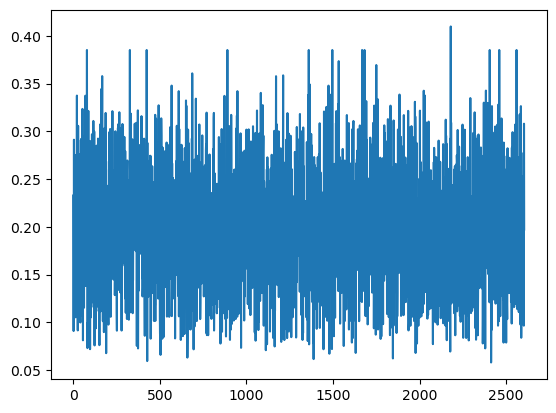

In [27]:
plt.plot(y_pred_probs)

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


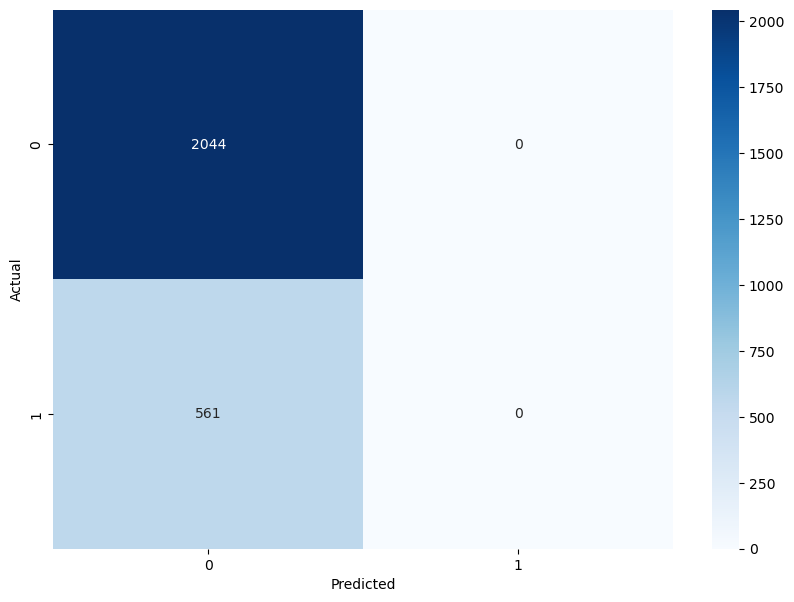

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
### RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)

In [ ]:
rf_model = rf_model.fit(X_train, y_train)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': importances
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)


In [ ]:
import matplotlib.pyplot as plt

# Sort feature importances in descending order and plot
sorted_idx = importances.argsort()[::-1]
plt.figure(figsize=(10, 12))
plt.barh(X.columns[sorted_idx], importances[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()


In [ ]:
print(feature_importance[0:30])

In [ ]:
feature_importance['Feature'][:20].to_list()

In [ ]:
#X = X[feature_importance['Feature'][:20].to_list()]

In [ ]:
unique_values = {column: X[column].unique().tolist() for column in X.columns}


In [ ]:
X

In [30]:
import tkinter as tk
from tkinter import ttk
import json

def get_input_values():
    input_data = {}
    
    # Retrieve selected values from dropdowns
    for column, categories in dummies_columns.items():
        selected_value = selected_options[column].get()  # Get selected category for this column
        if column == 'raceDistance':
            input_data[column] = selected_value
        else:
            for category in categories:
                key_name = column + '_' + category
                if category == selected_value:
                    input_data[key_name] = 1
                else:
                    input_data[key_name] = 0

    runner_name = runnerName_var.get()
    input_data['runnerName_encoded'] = name_to_label_mapping[runner_name]
    
    print(input_data)
    # At this point, 'input_data' should be ready for prediction (after appropriate preprocessing)


root = tk.Tk()
root.title("Model Input GUI")

# Variables for storing input from dropdowns
dummies_columns = {
    'weatherCondition': sorted(list(map(str, df.weatherCondition.dropna().unique()))),
    'trackCondition': sorted(list(map(str, df.trackCondition.dropna().unique()))),
    'meetingName': sorted(list(map(str, df.meetingName.dropna().unique()))),
    'runnerNumber': sorted(list(map(str, df.runnerNumber.dropna().unique()))),
    'raceClassConditions': sorted(list(map(str, df.raceClassConditions.dropna().unique()))),
    'raceDistance' : sorted(list(map(str, df.raceDistance.dropna().unique())))
}

vars = {column + '_' + str(category): tk.IntVar(value=0) for column, categories in dummies_columns.items() for category in categories}
selected_options = {column: tk.StringVar() for column in dummies_columns}  # This will store the selected options

# Create dropdowns for dummy variables
for index, column in enumerate(dummies_columns):
    ttk.Label(root, text=f"{column}:").grid(column=1, row=index+1, sticky=tk.W)
    dropdown = ttk.Combobox(root, textvariable=selected_options[column])  # Adjusted this line
    dropdown['values'] = dummies_columns[column]
    dropdown.grid(column=2, row=index+1)

# Define variable to store runnerName selection
runnerName_var = tk.StringVar()

# Loading the mapping from the saved JSON file
with open('name_to_label_mapping.json', 'r') as file:
    name_to_label_mapping = json.load(file)

# Dropdown for runnerName
ttk.Label(root, text="Runner Name:").grid(column=1, row=len(dummies_columns)+1, sticky=tk.W)
runnerName_dropdown = ttk.Combobox(root, textvariable=runnerName_var)  # Link variable here
runnerName_dropdown['values'] = list(name_to_label_mapping.keys())
runnerName_dropdown.grid(column=2, row=len(dummies_columns)+1)

# Submit button
ttk.Button(root, text="Submit", command=get_input_values).grid(column=2, row=len(dummies_columns) + 3)

root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/darcy5d/miniforge3/envs/tensor/lib/python3.8/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/22/c3r98x554qv7s1kh3_393tcm0000gn/T/ipykernel_27579/197543269.py", line 31, in get_input_values
    prediction = model.predict(input_df)
  File "/Users/darcy5d/miniforge3/envs/tensor/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/Users/darcy5d/miniforge3/envs/tensor/lib/python3.8/site-packages/tensorflow/python/framework/constant_op.py", line 98, in convert_to_eager_tensor
    return ops.EagerTensor(value, ctx.device_name, dtype)
ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).


In [ ]:
print(dummies_columns)

In [ ]:
## DROPDOWNS
# Weather conditions
# Track Condition
# Meeting Name
# Runner Name rename-barrier draw
# Race class conditions
# Distance